In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', None)

# Importing the dataset

In [3]:
dataset = pd.read_csv('APPROVED_BUILDING_PERMITS.csv', low_memory = False)
print(dataset.shape)

dataset.head()

(628341, 27)


,object_id,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,status,owner,occupancytype,sq_feet,address,city,state,zip,property_id,parcel_id,gpsy,gpsx,geom_2249,lat,long,geom_4326
0,1,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,"$36,500.00",$390.00,2021-01-28 16:29:26+00,2021-07-28 04:00:00+00,Open,ONE 83 STATE ST CONDO TR,Mixed,0.0,181-183 State ST,Boston,MA,02109,130392.0,3.038070e+08,2.956235e+06,777000.467775,0101000020C9080000014080EF50B6274128B89653E58D...,42.359190,-71.052924,0101000020E6100000A703291D63C351C074AD05ECF92D...
1,2,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,"$40,000.00",$429.00,2011-11-04 15:04:58+00,2012-05-04 04:00:00+00,Open,CITY OF BOSTON,Comm,170.0,175 W Boundary RD,West Roxbury,MA,02132,17268.0,2.012032e+09,2.920239e+06,751016.119559,0101000020C908000081DB363D50EB264164AA649F9747...,42.260750,-71.149611,0101000020E61000005F23793993C951C071ECAA3E6021...
2,3,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,Jusimar Oliveria,"$5,000.00",$70.00,2020-06-01 18:08:47+00,NaN,Open,15 PROSPECT STREET CONDOMINIUM TRUST,1-3FAM,0.0,15 Prospect ST,Charlestown,MA,02129,113443.0,2.028370e+08,2.962078e+06,775710.380542,0101000020C90800007E6BD6C23CAC2741422F500F4F99...,42.375243,-71.057585,0101000020E6100000F053B47AAFC351C0A6BB62F20730...
3,4,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"$74,295.75",$803.00,2019-11-13 18:38:56+00,2020-05-13 04:00:00+00,Closed,LEDERMAN US REAL ESTATE CORP,Multi,0.0,211 W Springfield ST,Roxbury,MA,02118,129994.0,4.025580e+08,2.949423e+06,769648.312793,0101000020C9080000025726A0E07C274183505E499780...,42.340600,-71.080251,0101000020E6100000D72A24D322C551C044521DC4982B...
4,5,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,"$15,000.00",$206.00,2013-01-03 19:13:09+00,2013-07-03 04:00:00+00,Open,MIARA SIMON,1-2FAM,0.0,14 William Jackson AVE,Brighton,MA,02135,149852.0,2.204944e+09,2.950791e+06,749690.298790,0101000020C9080000FCFDFA98F4E02641F6694F594383...,42.344600,-71.154051,0101000020E61000009DED6FF7DBC951C0929A5BD71B2C...


# Handling Missing Values

In [4]:
dataset = dataset.dropna()
print(dataset.shape)

dataset.head()

(555918, 27)


,object_id,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,status,owner,occupancytype,sq_feet,address,city,state,zip,property_id,parcel_id,gpsy,gpsx,geom_2249,lat,long,geom_4326
0,1,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,"$36,500.00",$390.00,2021-01-28 16:29:26+00,2021-07-28 04:00:00+00,Open,ONE 83 STATE ST CONDO TR,Mixed,0.0,181-183 State ST,Boston,MA,02109,130392.0,3.038070e+08,2.956235e+06,777000.467775,0101000020C9080000014080EF50B6274128B89653E58D...,42.35919,-71.052924,0101000020E6100000A703291D63C351C074AD05ECF92D...
1,2,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,"$40,000.00",$429.00,2011-11-04 15:04:58+00,2012-05-04 04:00:00+00,Open,CITY OF BOSTON,Comm,170.0,175 W Boundary RD,West Roxbury,MA,02132,17268.0,2.012032e+09,2.920239e+06,751016.119559,0101000020C908000081DB363D50EB264164AA649F9747...,42.26075,-71.149611,0101000020E61000005F23793993C951C071ECAA3E6021...
3,4,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"$74,295.75",$803.00,2019-11-13 18:38:56+00,2020-05-13 04:00:00+00,Closed,LEDERMAN US REAL ESTATE CORP,Multi,0.0,211 W Springfield ST,Roxbury,MA,02118,129994.0,4.025580e+08,2.949423e+06,769648.312793,0101000020C9080000025726A0E07C274183505E499780...,42.34060,-71.080251,0101000020E6100000D72A24D322C551C044521DC4982B...
5,6,A1001913,INTREN,Amendment to a Long Form,Renovations - Interior NSC,Amendment to issued permit ALT888985. relocate...,Chloe Manning,$1.00,$33.00,2019-10-18 13:21:00+00,2020-04-18 04:00:00+00,Closed,MABB LLC,Comm,0.0,130-140 Brighton AVE,Allston,MA,02134,20073.0,2.100846e+09,2.953789e+06,755678.944235,0101000020C908000082D572E3BD0F27412AFE73BE1E89...,42.35276,-71.131851,0101000020E6100000FF719A3D70C851C058E5243A272D...
6,7,A1002445,INTREN,Amendment to a Long Form,Renovations - Interior NSC,Install new beam in basement sister joists to...,Richard Hester,"$50,000.00",$556.00,2019-11-12 16:00:03+00,2020-05-12 04:00:00+00,Open,WARNER DIETRICH H,1-2FAM,0.0,7 Amboy ST,Allston,MA,02134,3077.0,2.200085e+09,2.956331e+06,757700.459597,0101000020C9080000005950EB881F2741C2AB6189158E...,42.35971,-71.124331,0101000020E61000000F9D4C08F5C751C04B3ADFF60A2E...


# Converting few features to temporal features

In [5]:
dataset['issued_date'] = pd.to_datetime(dataset['issued_date'])
dataset['expiration_date'] = pd.to_datetime(dataset['expiration_date'])

dataset['issued_day'] = dataset['issued_date'].dt.day
dataset['issued_month'] = dataset['issued_date'].dt.month
dataset['issued_year'] = dataset['issued_date'].dt.year

dataset['expiration_day'] = dataset['expiration_date'].dt.day
dataset['expiration_month'] = dataset['expiration_date'].dt.month
dataset['expiration_year'] = dataset['expiration_date'].dt.year

dataset['Processing Time'] = (dataset['expiration_date'] - dataset['issued_date']).dt.days

In [6]:
dataset.head()

,object_id,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,status,owner,occupancytype,sq_feet,address,city,state,zip,property_id,parcel_id,gpsy,gpsx,geom_2249,lat,long,geom_4326,issued_day,issued_month,issued_year,expiration_day,expiration_month,expiration_year,Processing Time
0,1,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,"$36,500.00",$390.00,2021-01-28 16:29:26+00:00,2021-07-28 04:00:00+00:00,Open,ONE 83 STATE ST CONDO TR,Mixed,0.0,181-183 State ST,Boston,MA,02109,130392.0,3.038070e+08,2.956235e+06,777000.467775,0101000020C9080000014080EF50B6274128B89653E58D...,42.35919,-71.052924,0101000020E6100000A703291D63C351C074AD05ECF92D...,28,1,2021,28,7,2021,180
1,2,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,"$40,000.00",$429.00,2011-11-04 15:04:58+00:00,2012-05-04 04:00:00+00:00,Open,CITY OF BOSTON,Comm,170.0,175 W Boundary RD,West Roxbury,MA,02132,17268.0,2.012032e+09,2.920239e+06,751016.119559,0101000020C908000081DB363D50EB264164AA649F9747...,42.26075,-71.149611,0101000020E61000005F23793993C951C071ECAA3E6021...,4,11,2011,4,5,2012,181
3,4,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"$74,295.75",$803.00,2019-11-13 18:38:56+00:00,2020-05-13 04:00:00+00:00,Closed,LEDERMAN US REAL ESTATE CORP,Multi,0.0,211 W Springfield ST,Roxbury,MA,02118,129994.0,4.025580e+08,2.949423e+06,769648.312793,0101000020C9080000025726A0E07C274183505E499780...,42.34060,-71.080251,0101000020E6100000D72A24D322C551C044521DC4982B...,13,11,2019,13,5,2020,181
5,6,A1001913,INTREN,Amendment to a Long Form,Renovations - Interior NSC,Amendment to issued permit ALT888985. relocate...,Chloe Manning,$1.00,$33.00,2019-10-18 13:21:00+00:00,2020-04-18 04:00:00+00:00,Closed,MABB LLC,Comm,0.0,130-140 Brighton AVE,Allston,MA,02134,20073.0,2.100846e+09,2.953789e+06,755678.944235,0101000020C908000082D572E3BD0F27412AFE73BE1E89...,42.35276,-71.131851,0101000020E6100000FF719A3D70C851C058E5243A272D...,18,10,2019,18,4,2020,182
6,7,A1002445,INTREN,Amendment to a Long Form,Renovations - Interior NSC,Install new beam in basement sister joists to...,Richard Hester,"$50,000.00",$556.00,2019-11-12 16:00:03+00:00,2020-05-12 04:00:00+00:00,Open,WARNER DIETRICH H,1-2FAM,0.0,7 Amboy ST,Allston,MA,02134,3077.0,2.200085e+09,2.956331e+06,757700.459597,0101000020C9080000005950EB881F2741C2AB6189158E...,42.35971,-71.124331,0101000020E61000000F9D4C08F5C751C04B3ADFF60A2E...,12,11,2019,12,5,2020,181


# Cleaning

In [7]:
dataset.drop(['object_id', 'permitnumber', 'parcel_id', 'gpsy', 'gpsx', 'geom_2249', 'geom_4326', 'issued_date', 'expiration_date'], axis = 1, inplace = True)

In [8]:
dataset['declared_valuation'] = dataset['declared_valuation'].replace('[\$,]', '', regex=True).astype(float)
dataset['total_fees'] = dataset['total_fees'].replace('[\$,]', '', regex=True).astype(float)

dataset.head()

,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,status,owner,occupancytype,sq_feet,address,city,state,zip,property_id,lat,long,issued_day,issued_month,issued_year,expiration_day,expiration_month,expiration_year,Processing Time
0,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,36500.00,390.0,Open,ONE 83 STATE ST CONDO TR,Mixed,0.0,181-183 State ST,Boston,MA,02109,130392.0,42.35919,-71.052924,28,1,2021,28,7,2021,180
1,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,40000.00,429.0,Open,CITY OF BOSTON,Comm,170.0,175 W Boundary RD,West Roxbury,MA,02132,17268.0,42.26075,-71.149611,4,11,2011,4,5,2012,181
3,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,74295.75,803.0,Closed,LEDERMAN US REAL ESTATE CORP,Multi,0.0,211 W Springfield ST,Roxbury,MA,02118,129994.0,42.34060,-71.080251,13,11,2019,13,5,2020,181
5,INTREN,Amendment to a Long Form,Renovations - Interior NSC,Amendment to issued permit ALT888985. relocate...,Chloe Manning,1.00,33.0,Closed,MABB LLC,Comm,0.0,130-140 Brighton AVE,Allston,MA,02134,20073.0,42.35276,-71.131851,18,10,2019,18,4,2020,182
6,INTREN,Amendment to a Long Form,Renovations - Interior NSC,Install new beam in basement sister joists to...,Richard Hester,50000.00,556.0,Open,WARNER DIETRICH H,1-2FAM,0.0,7 Amboy ST,Allston,MA,02134,3077.0,42.35971,-71.124331,12,11,2019,12,5,2020,181


# The Variable Types

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555918 entries, 0 to 628340
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   worktype            555918 non-null  object 
 1   permittypedescr     555918 non-null  object 
 2   description         555918 non-null  object 
 3   comments            555918 non-null  object 
 4   applicant           555918 non-null  object 
 5   declared_valuation  555918 non-null  float64
 6   total_fees          555918 non-null  float64
 7   status              555918 non-null  object 
 8   owner               555918 non-null  object 
 9   occupancytype       555918 non-null  object 
 10  sq_feet             555918 non-null  float64
 11  address             555918 non-null  object 
 12  city                555918 non-null  object 
 13  state               555918 non-null  object 
 14  zip                 555918 non-null  object 
 15  property_id         555918 non-null  fl

In [10]:
temporal_features = ['issued_day', 'issued_month', 'issued_year', 'expiration_day', 'expiration_month', 'expiration_year']
print('Total number of temporal features: ', len(temporal_features))

print(temporal_features)

Total number of temporal features:  6
['issued_day', 'issued_month', 'issued_year', 'expiration_day', 'expiration_month', 'expiration_year']


In [11]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'object' and feature not in temporal_features]
print('Total number of numerical features: ', len(numerical_features))

print(numerical_features)

Total number of numerical features:  7
['declared_valuation', 'total_fees', 'sq_feet', 'property_id', 'lat', 'long', 'Processing Time']


In [12]:
categorical_features = [feature for feature in dataset.columns if feature not in numerical_features and feature not in temporal_features]
print('Total number of categorical features: ', len(categorical_features))

print(categorical_features)

Total number of categorical features:  12
['worktype', 'permittypedescr', 'description', 'comments', 'applicant', 'status', 'owner', 'occupancytype', 'address', 'city', 'state', 'zip']


# Data Analysis

## Describe

In [13]:
dataset.describe()

,declared_valuation,total_fees,sq_feet,property_id,lat,long,issued_day,issued_month,issued_year,expiration_day,expiration_month,expiration_year,Processing Time
count,5.559180e+05,5.559180e+05,5.559180e+05,555918.000000,555918.000000,555918.000000,555918.000000,555918.000000,555918.000000,555918.000000,555918.000000,555918.000000,555918.000000
mean,1.166402e+05,1.789933e+03,1.931383e+04,119792.063490,42.327782,-71.085179,15.802295,6.611777,2016.522924,15.775057,6.397911,2017.041150,181.814998
std,4.087588e+06,3.199031e+05,1.341221e+07,99903.616517,0.033817,0.035732,8.727168,3.344205,3.881170,8.686594,3.532444,3.914937,108.693400
min,-1.000000e+06,-3.352000e+01,0.000000e+00,4.000000,42.230291,-71.185400,1.000000,1.000000,2006.000000,1.000000,1.000000,1805.000000,-79190.000000
25%,1.500000e+03,3.300000e+01,0.000000e+00,49350.000000,42.299150,-71.108261,8.000000,4.000000,2013.000000,8.000000,3.000000,2014.000000,181.000000
50%,5.500000e+03,7.000000e+01,0.000000e+00,101083.000000,42.337731,-71.076729,16.000000,7.000000,2017.000000,16.000000,6.000000,2017.000000,182.000000
75%,2.000000e+04,1.900000e+02,0.000000e+00,150352.750000,42.353086,-71.059224,23.000000,9.000000,2020.000000,23.000000,10.000000,2020.000000,183.000000
max,2.100000e+09,2.250152e+08,1.000000e+10,459501.000000,42.395173,-70.994860,31.000000,12.000000,2023.000000,31.000000,12.000000,2024.000000,3838.000000


- **The mean declared valuation is approximately 116,640, with a standard deviation of 4,087,588. The minimum declared valuation is negative, potentially indicating errors or outliers. The 25th, 50th (median), and 75th percentiles are 1,500, 5,500, and 20,000, respectively. The maximum declared valuation is 2,100,000,000.**

- **The mean total fees are approximately \$1,789.93, with a standard deviation of 319,903.10. The minimum total fees are negative, potentially indicating errors or outliers. The 25th, 50th (median), and 75th percentiles are 33, 70, and 190, respectively. The maximum total fees are 225,015,200.**

- **The mean square footage is approximately 19,313, with a wide standard deviation of approximately 13,412. The minimum square footage is 0, and the 25th, 50th (median), and 75th percentiles are also 0.**

- **The mean property ID is approximately 119,792, with a standard deviation of approximately 99,903. The minimum property ID is 4, and the 25th, 50th (median), and 75th percentiles are 49,350, 101,083, and 150,352.75, respectively. The maximum property ID is 459,501.**

- **The mean latitude is approximately 42.33, with a small standard deviation of approximately 0.03. The minimum latitude is 42.23, and the 25th, 50th (median), and 75th percentiles are 42.30, 42.34, and 42.35, respectively. The maximum latitude is 42.40.**

- **The mean longitude is approximately -71.09, with a small standard deviation of approximately 0.04. The minimum longitude is -71.19, and the 25th, 50th (median), and 75th percentiles are -71.11, -71.08, and -71.06, respectively. The maximum longitude is -70.99.**

- **The dataset includes information on the day, month, and year of permit issuance and expiration.**

- **The mean processing time is approximately 181.81 days, with a standard deviation of approximately 108.69. The minimum and maximum processing times are -79,190 and 3,838 days, respectively, potentially indicating errors or outliers. However, there are outliers with negative and extremely large processing times.**


## Correlation Analysis

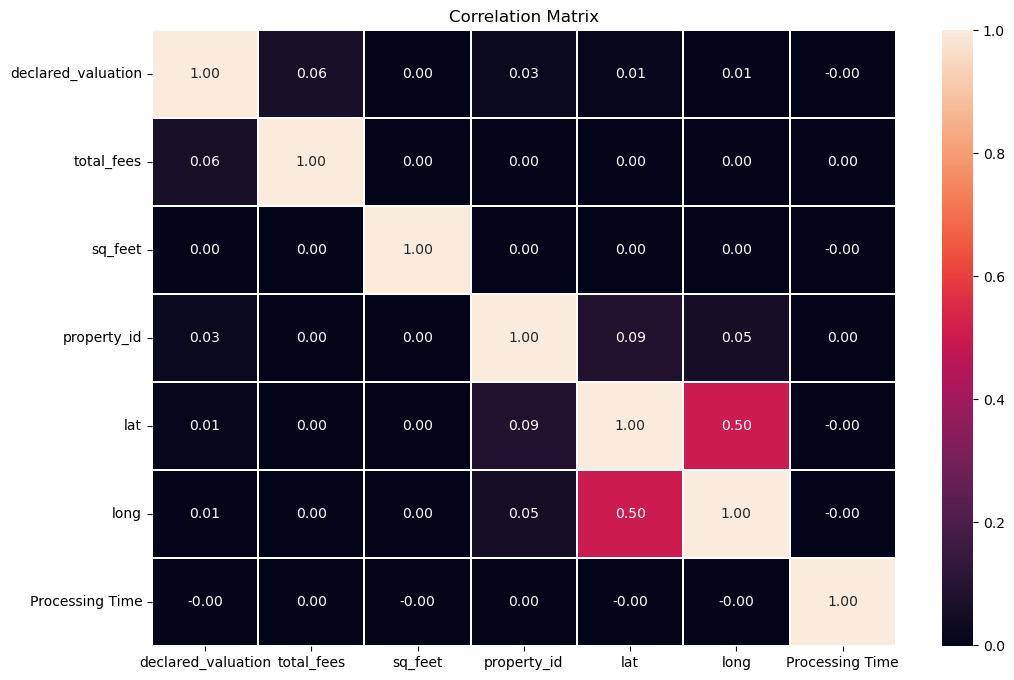

In [14]:
# Calculate correlation matrix
correlation_matrix = dataset[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f', linewidths = 0.2)
plt.title('Correlation Matrix')

plt.show()

- **There are no strong correlations among the features of the dataset.**

## Average Evaluation by status

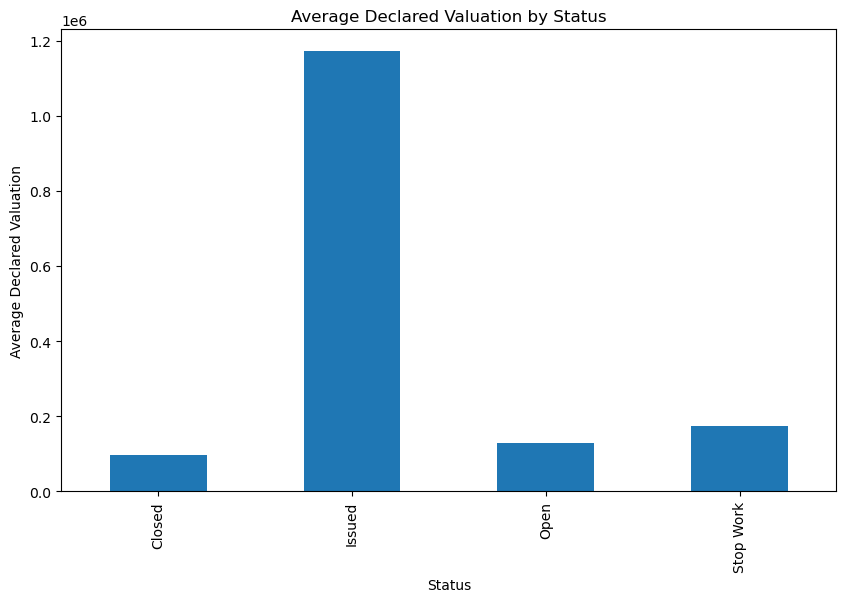

In [15]:
avg_valuation_by_status = dataset.groupby('status')['declared_valuation'].mean()

plt.figure(figsize = (10, 6))
avg_valuation_by_status.plot(kind = 'bar')
plt.title('Average Declared Valuation by Status')
plt.xlabel('Status')
plt.ylabel('Average Declared Valuation')

plt.show()

- **Closed Status:**
  - Mean Declared Valuation: Approximately $97,343.55

- **Issued Status:**
  - Mean Declared Valuation: Approximately $1,171,383

- **Open Status:**
  - Mean Declared Valuation: Approximately $128,213.20

- **Stop Work Status:**
  - Mean Declared Valuation: Approximately $173,901


## Distribution Analysis

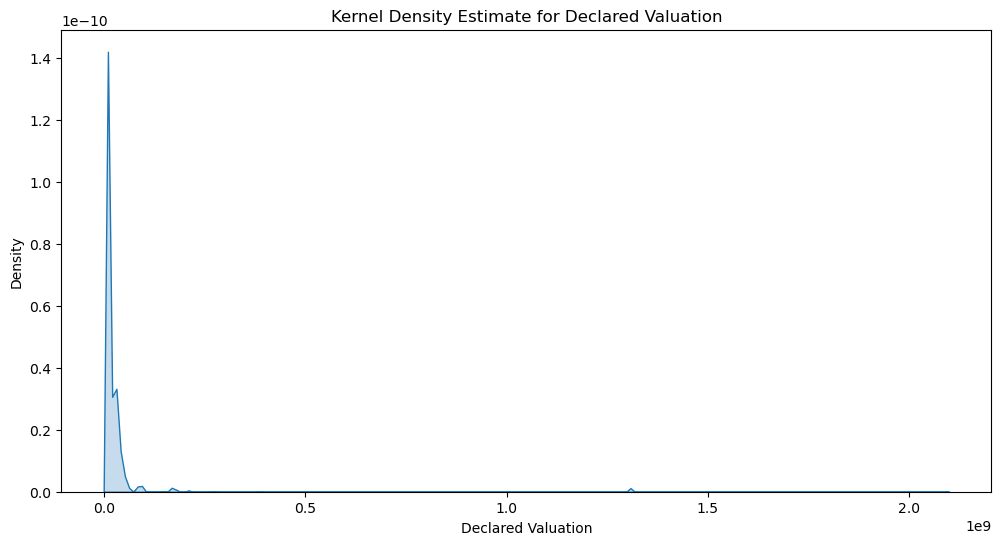

In [16]:
plt.figure(figsize = (12, 6))
sns.kdeplot(dataset['declared_valuation'], fill = True)

plt.title('Kernel Density Estimate for Declared Valuation')
plt.xlabel('Declared Valuation')

plt.show()

**There are extreme outliers present in the dataset.**

## Declared Valuation Over the Years

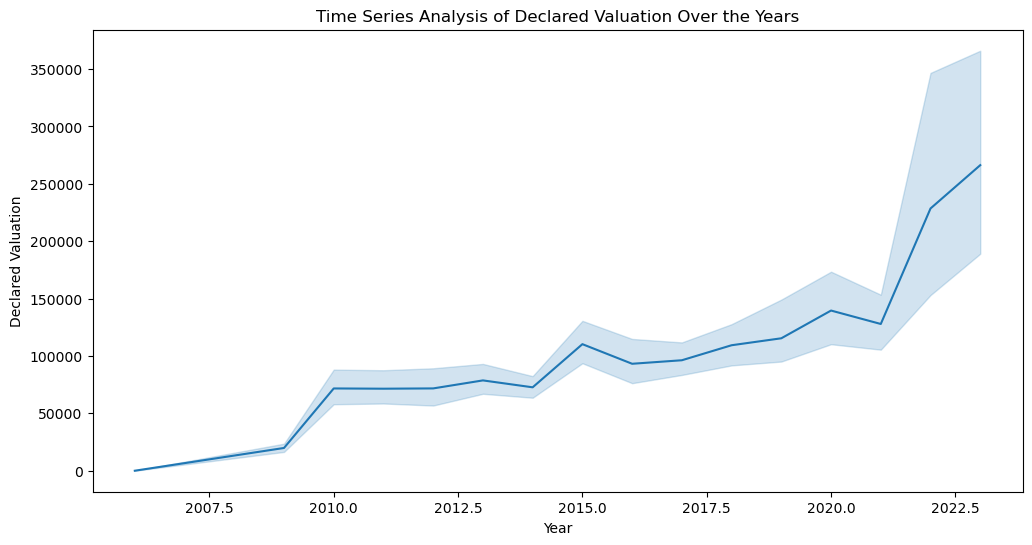

In [17]:
plt.figure(figsize=(12, 6))

sns.lineplot(x = 'issued_year', y = 'declared_valuation', data = dataset)
plt.title('Time Series Analysis of Declared Valuation Over the Years')

plt.xlabel('Year')
plt.ylabel('Declared Valuation')

plt.show()

- **Over the course of the observed time period, there is a discernible upward trend in the valuation. This upward trajectory suggests a consistent and progressive increase in the declared valuation values. The data indicates a positive movement in the assessed values over time, signifying potential growth, appreciation, or escalating property values within the dataset.**

## Regression Analysis

In [18]:
X = dataset[['sq_feet', 'issued_year']]
y = dataset['declared_valuation']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     declared_valuation   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     35.55
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           3.66e-16
Time:                        21:42:28   Log-Likelihood:            -9.2518e+06
No. Observations:              555918   AIC:                         1.850e+07
Df Residuals:                  555915   BIC:                         1.850e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.39e+07   2.85e+06     -8.390      

- **The ordinary least squares (OLS) regression results indicate a model with a very low R-squared value, suggesting that the model does not explain much of the variability in the declared valuations. The coefficients for the constant, square footage (sq_feet), and issued year variables are provided, with the constant showing a significant negative impact on the declared valuation.**
- **However, the sq_feet variable does not appear to have a statistically significant effect, while the issued year variable has a positive and statistically significant impact on the declared valuation. The overall model fit is weak, as evidenced by the low R-squared value, and caution is advised due to potential numerical problems such as multicollinearity, as indicated by the large condition number.**

## Average Processing Time by permit time

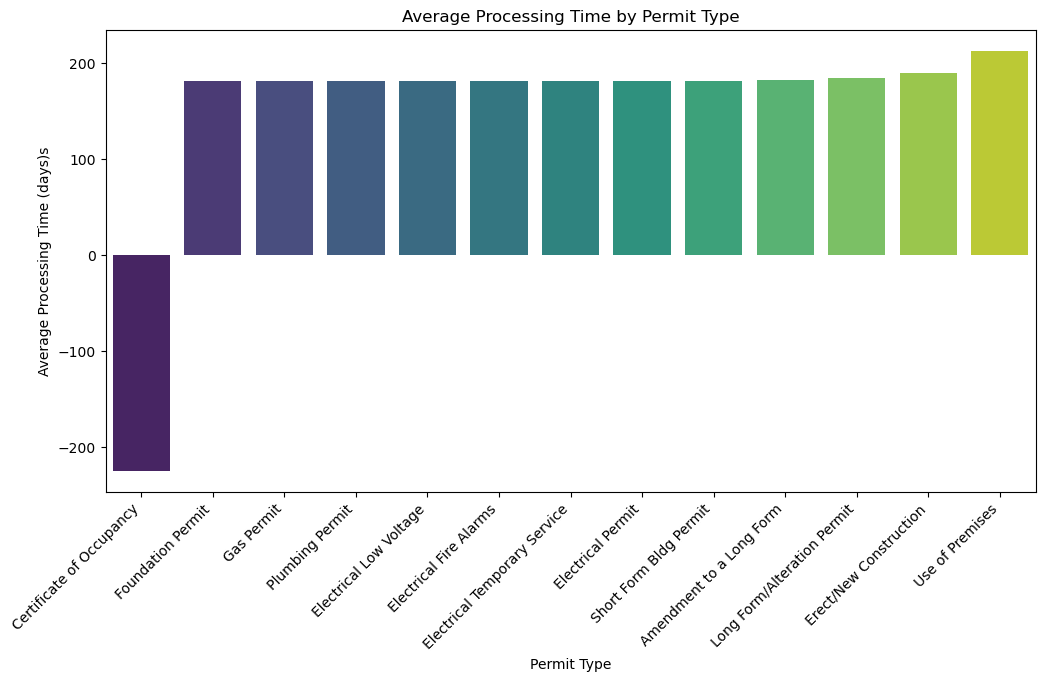

In [19]:
avg_processing_time = dataset.groupby('permittypedescr')['Processing Time'].mean().sort_values()

plt.figure(figsize = (12, 6))
sns.barplot(x = avg_processing_time.index, y = avg_processing_time.values, palette = 'viridis')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Average Processing Time by Permit Type')
plt.xlabel('Permit Type')
plt.ylabel('Average Processing Time (days)s')

plt.show()

**The negative average processing time for "Certificate of Occupancy" (-225.04 days) is likely an anomaly or an error in the data.**

**The other permit types have positive average processing times ranging from approximately 181 to 212 days. These values represent the average duration it takes for permits of each type to be processed, providing insights into the efficiency of the permitting process for different construction activities.**

## Spatial Distribution of Permits

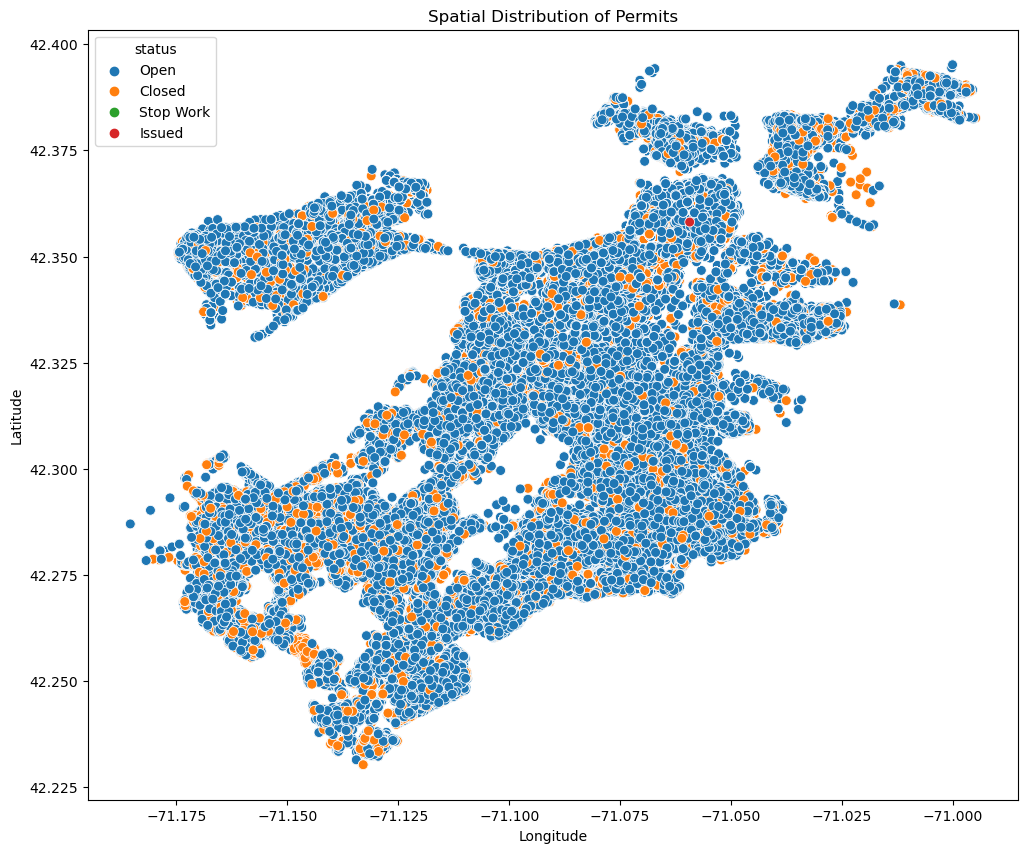

In [20]:
plt.figure(figsize = (12, 10))

sns.scatterplot(x = 'long', y = 'lat', hue = 'status', data = dataset, s = 50)
plt.title('Spatial Distribution of Permits')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

- **Permits are opened in majority of the places**

# Analysis

- **How has the average processing time for building permits changed over the years?**

## Importing the dataset

In [21]:
dataset = pd.read_csv('APPROVED_BUILDING_PERMITS.csv', low_memory = False)
print(dataset.shape)

dataset.head()

(628341, 27)


,object_id,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,status,owner,occupancytype,sq_feet,address,city,state,zip,property_id,parcel_id,gpsy,gpsx,geom_2249,lat,long,geom_4326
0,1,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,"$36,500.00",$390.00,2021-01-28 16:29:26+00,2021-07-28 04:00:00+00,Open,ONE 83 STATE ST CONDO TR,Mixed,0.0,181-183 State ST,Boston,MA,02109,130392.0,3.038070e+08,2.956235e+06,777000.467775,0101000020C9080000014080EF50B6274128B89653E58D...,42.359190,-71.052924,0101000020E6100000A703291D63C351C074AD05ECF92D...
1,2,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,"$40,000.00",$429.00,2011-11-04 15:04:58+00,2012-05-04 04:00:00+00,Open,CITY OF BOSTON,Comm,170.0,175 W Boundary RD,West Roxbury,MA,02132,17268.0,2.012032e+09,2.920239e+06,751016.119559,0101000020C908000081DB363D50EB264164AA649F9747...,42.260750,-71.149611,0101000020E61000005F23793993C951C071ECAA3E6021...
2,3,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,Jusimar Oliveria,"$5,000.00",$70.00,2020-06-01 18:08:47+00,NaN,Open,15 PROSPECT STREET CONDOMINIUM TRUST,1-3FAM,0.0,15 Prospect ST,Charlestown,MA,02129,113443.0,2.028370e+08,2.962078e+06,775710.380542,0101000020C90800007E6BD6C23CAC2741422F500F4F99...,42.375243,-71.057585,0101000020E6100000F053B47AAFC351C0A6BB62F20730...
3,4,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"$74,295.75",$803.00,2019-11-13 18:38:56+00,2020-05-13 04:00:00+00,Closed,LEDERMAN US REAL ESTATE CORP,Multi,0.0,211 W Springfield ST,Roxbury,MA,02118,129994.0,4.025580e+08,2.949423e+06,769648.312793,0101000020C9080000025726A0E07C274183505E499780...,42.340600,-71.080251,0101000020E6100000D72A24D322C551C044521DC4982B...
4,5,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,"$15,000.00",$206.00,2013-01-03 19:13:09+00,2013-07-03 04:00:00+00,Open,MIARA SIMON,1-2FAM,0.0,14 William Jackson AVE,Brighton,MA,02135,149852.0,2.204944e+09,2.950791e+06,749690.298790,0101000020C9080000FCFDFA98F4E02641F6694F594383...,42.344600,-71.154051,0101000020E61000009DED6FF7DBC951C0929A5BD71B2C...


- **To know the average processing time for building permits changed over the years, we need processing_time feature which can be derived from issued data and expiration date.**
- **The difference between issued date and expiration date is the processing time itself.**

In [22]:
dataset.dropna(inplace = True)
print("The shape of the dataset, after removing the null values: ", dataset.shape)

The shape of the dataset, after removing the null values:  (555918, 27)


In [23]:
dataset['issued_date'] = pd.to_datetime(dataset['issued_date'])
dataset['expiration_date'] = pd.to_datetime(dataset['expiration_date'])

dataset['issued_day'] = dataset['issued_date'].dt.day
dataset['issued_month'] = dataset['issued_date'].dt.month
dataset['issued_year'] = dataset['issued_date'].dt.year

dataset['expiration_day'] = dataset['expiration_date'].dt.day
dataset['expiration_month'] = dataset['expiration_date'].dt.month
dataset['expiration_year'] = dataset['expiration_date'].dt.year

dataset['Processing Time'] = (dataset['expiration_date'] - dataset['issued_date']).dt.days

In [24]:
dataset.set_index('issued_date', inplace = True)
dataset.head()

,object_id,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,expiration_date,status,owner,occupancytype,sq_feet,address,city,state,zip,property_id,parcel_id,gpsy,gpsx,geom_2249,lat,long,geom_4326,issued_day,issued_month,issued_year,expiration_day,expiration_month,expiration_year,Processing Time
issued_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-28 16:29:26+00:00,1,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,"$36,500.00",$390.00,2021-07-28 04:00:00+00:00,Open,ONE 83 STATE ST CONDO TR,Mixed,0.0,181-183 State ST,Boston,MA,02109,130392.0,3.038070e+08,2.956235e+06,777000.467775,0101000020C9080000014080EF50B6274128B89653E58D...,42.35919,-71.052924,0101000020E6100000A703291D63C351C074AD05ECF92D...,28,1,2021,28,7,2021,180
2011-11-04 15:04:58+00:00,2,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,"$40,000.00",$429.00,2012-05-04 04:00:00+00:00,Open,CITY OF BOSTON,Comm,170.0,175 W Boundary RD,West Roxbury,MA,02132,17268.0,2.012032e+09,2.920239e+06,751016.119559,0101000020C908000081DB363D50EB264164AA649F9747...,42.26075,-71.149611,0101000020E61000005F23793993C951C071ECAA3E6021...,4,11,2011,4,5,2012,181
2019-11-13 18:38:56+00:00,4,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"$74,295.75",$803.00,2020-05-13 04:00:00+00:00,Closed,LEDERMAN US REAL ESTATE CORP,Multi,0.0,211 W Springfield ST,Roxbury,MA,02118,129994.0,4.025580e+08,2.949423e+06,769648.312793,0101000020C9080000025726A0E07C274183505E499780...,42.34060,-71.080251,0101000020E6100000D72A24D322C551C044521DC4982B...,13,11,2019,13,5,2020,181
2019-10-18 13:21:00+00:00,6,A1001913,INTREN,Amendment to a Long Form,Renovations - Interior NSC,Amendment to issued permit ALT888985. relocate...,Chloe Manning,$1.00,$33.00,2020-04-18 04:00:00+00:00,Closed,MABB LLC,Comm,0.0,130-140 Brighton AVE,Allston,MA,02134,20073.0,2.100846e+09,2.953789e+06,755678.944235,0101000020C908000082D572E3BD0F27412AFE73BE1E89...,42.35276,-71.131851,0101000020E6100000FF719A3D70C851C058E5243A272D...,18,10,2019,18,4,2020,182
2019-11-12 16:00:03+00:00,7,A1002445,INTREN,Amendment to a Long Form,Renovations - Interior NSC,Install new beam in basement sister joists to...,Richard Hester,"$50,000.00",$556.00,2020-05-12 04:00:00+00:00,Open,WARNER DIETRICH H,1-2FAM,0.0,7 Amboy ST,Allston,MA,02134,3077.0,2.200085e+09,2.956331e+06,757700.459597,0101000020C9080000005950EB881F2741C2AB6189158E...,42.35971,-71.124331,0101000020E61000000F9D4C08F5C751C04B3ADFF60A2E...,12,11,2019,12,5,2020,181


## Sorting the data based on the issued date

In [25]:
dataset.sort_index(inplace = True)
dataset.head()

,object_id,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,expiration_date,status,owner,occupancytype,sq_feet,address,city,state,zip,property_id,parcel_id,gpsy,gpsx,geom_2249,lat,long,geom_4326,issued_day,issued_month,issued_year,expiration_day,expiration_month,expiration_year,Processing Time
issued_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-09-26 04:00:00+00:00,627967,U497392,CONVRT,Use of Premises,From TimeMatters-PZ Conversion,Proposed Work: Two vehicle parking Last Actio...,,$0.00,$0.00,2014-01-29 05:00:00+00:00,Open,MOURAD EDWARD,1-3FAM,0.0,93 Sydney ST,Dorchester,MA,02125,317194.0,1.302644e+09,2.940004e+06,777219.152544,0101000020C908000083301A4E06B82741DD8C4319326E...,42.31465,-71.052431,0101000020E6100000442996055BC351C07385716F4628...,26,9,2006,29,1,2014,2682
2006-09-26 04:00:00+00:00,627966,U497392,CONVRT,Use of Premises,From TimeMatters-PZ Conversion,Proposed Work: Two vehicle parking Last Actio...,Edward Mourad,$0.00,$0.00,2014-01-29 05:00:00+00:00,Open,MOURAD EDWARD,1-3FAM,0.0,93 Sydney ST,Dorchester,MA,02125,317194.0,1.302644e+09,2.940004e+06,777219.152544,0101000020C908000083301A4E06B82741DD8C4319326E...,42.31465,-71.052431,0101000020E6100000442996055BC351C07385716F4628...,26,9,2006,29,1,2014,2682
2009-04-21 04:00:00+00:00,44978,ALT9460,FSTTRK,Long Form/Alteration Permit,Fast Track Application,Proposed Work: Altman Vilandrie - 37th floorTe...,francesca DiRico,$0.00,$0.00,2014-01-15 05:00:00+00:00,Open,53 STATE PROPERTY LP,COMM,0.0,53 State ST,Boston,MA,02109,314216.0,3.038700e+08,2.956073e+06,776115.867743,0101000020C908000084BF48BC67AF2741619717AA948D...,42.35876,-71.056200,0101000020E6100000CA3FBCC998C351C07524F5D4EB2D...,21,4,2009,15,1,2014,1730
2009-04-21 04:00:00+00:00,44979,ALT9460,FSTTRK,Long Form/Alteration Permit,Fast Track Application,Proposed Work: Altman Vilandrie - 37th floorTe...,Structure Tone Inc.,$0.00,$0.00,2014-01-15 05:00:00+00:00,Open,53 STATE PROPERTY LP,COMM,0.0,53 State ST,Boston,MA,02109,314216.0,3.038700e+08,2.956073e+06,776115.867743,0101000020C908000084BF48BC67AF2741619717AA948D...,42.35876,-71.056200,0101000020E6100000CA3FBCC998C351C07524F5D4EB2D...,21,4,2009,15,1,2014,1730
2009-12-09 20:56:06+00:00,461071,SF1031,OTHER,Short Form Bldg Permit,Other,repairing sheetrock installing replacement wi...,Kenneth Murphy,"$5,000.00",$57.00,2010-06-09 04:00:00+00:00,Closed,RYAN JILL M,1-2FAM,0.0,36 Birch RD,West Roxbury,MA,02132,15548.0,2.011412e+09,2.921056e+06,748430.380325,0101000020C9080000FFECB9C21CD72641888518003049...,42.26302,-71.159151,0101000020E6100000A7DE33872FCA51C09ED1E9A0AA21...,9,12,2009,9,6,2010,181


## Converting the datatype of the feature "Processing Time".

In [26]:
# dataset["Processing Time"] = pd.to_timedelta(dataset["Processing Time"])

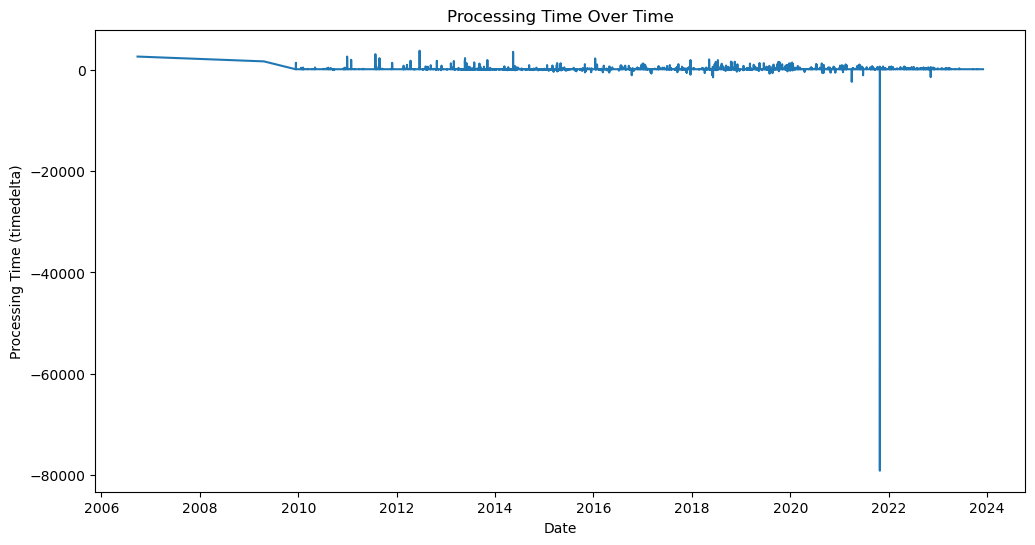

In [27]:
plt.figure(figsize=(12, 6))

plt.plot(dataset['Processing Time'])

plt.title('Processing Time Over Time')
plt.xlabel('Date')
plt.ylabel('Processing Time (timedelta)')

plt.show()

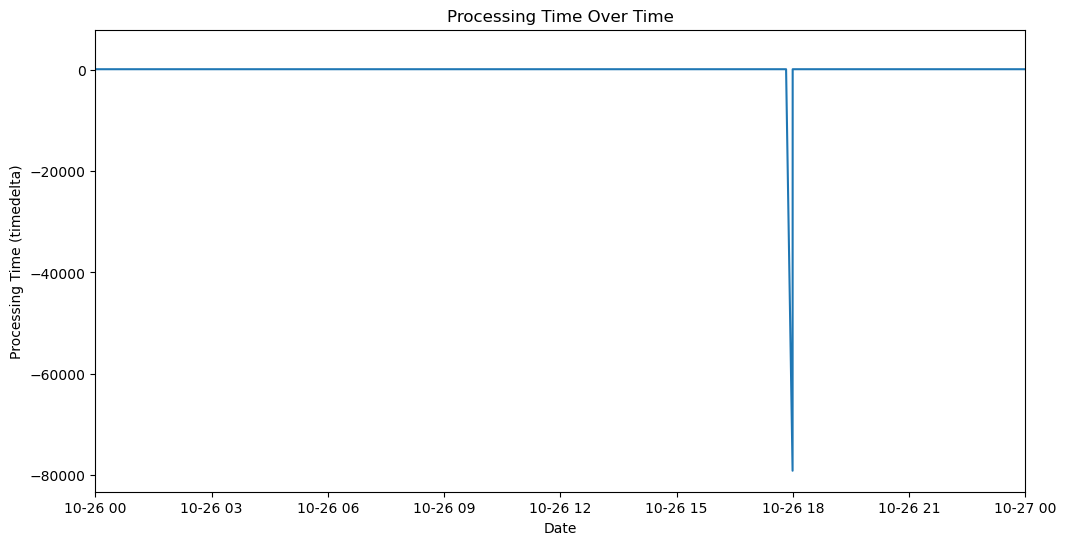

In [28]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'dataset' and 'issued_date' is the datetime column
plt.figure(figsize=(12, 6))
plt.plot(dataset['Processing Time'])
plt.title('Processing Time Over Time')
plt.xlabel('Date')
plt.ylabel('Processing Time (timedelta)')

drastic_drop_start_date = pd.to_datetime('2021-10-26', utc = True)
drastic_drop_end_date = pd.to_datetime('2021-10-27', utc = True)
plt.xlim(drastic_drop_start_date, drastic_drop_end_date)

plt.show()

In [29]:
dataset.loc[(dataset.index >= drastic_drop_start_date) & (dataset.index <= drastic_drop_end_date)]['Processing Time'].value_counts()

Processing Time
 181      183
-79190      1
Name: count, dtype: int64

- **Hah! We found the outlier.**

In [30]:
dataset[dataset['Processing Time'] == -79190]

,object_id,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,expiration_date,status,owner,occupancytype,sq_feet,address,city,state,zip,property_id,parcel_id,gpsy,gpsx,geom_2249,lat,long,geom_4326,issued_day,issued_month,issued_year,expiration_day,expiration_month,expiration_year,Processing Time
issued_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-26 17:59:42+00:00,50000,COO1248815,INTEXT,Certificate of Occupancy,Interior/Exterior Work,Offices Warehouse Photo Processing Lab Ligh...,Andrew Colameta,"$182,410.00","$4,538.25",1805-01-03 04:56:02+00:00,Closed,RREF II 451 D LLC,Comm,2730.0,451 D ST,Boston,MA,02210,45546.0,602825000.0,2.951152e+06,779985.713986,0101000020C908000004978F6DA3CD27412A81E210F883...,42.345199,-71.04198,0101000020E6100000A1A1B9CEAFC251C0B683487F2F2C...,26,10,2021,3,1,1805,-79190


- **Removing the outlier**

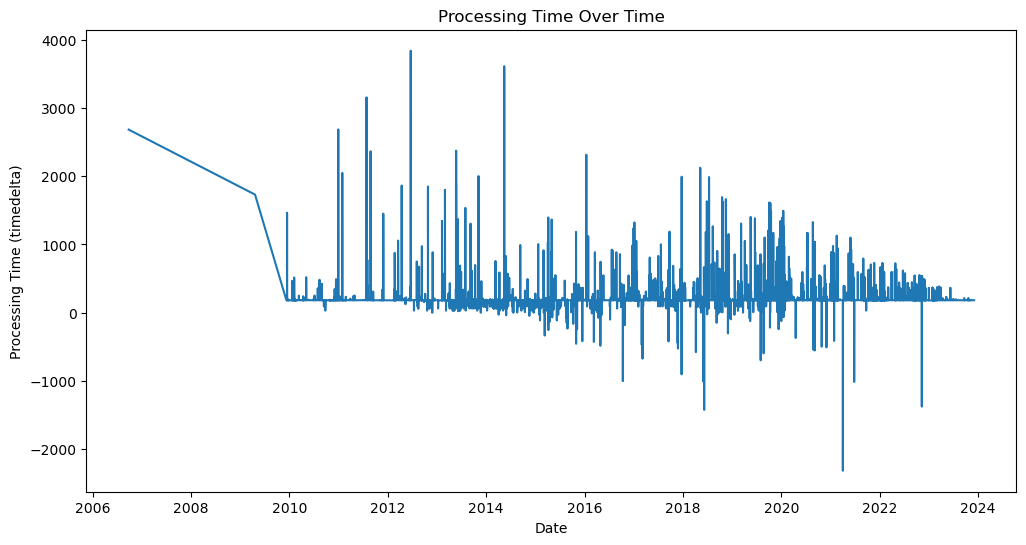

In [31]:
temp_dataset = dataset[dataset['Processing Time'] != -79190]

plt.figure(figsize=(12, 6))

plt.plot(temp_dataset['Processing Time'])

plt.title('Processing Time Over Time')
plt.xlabel('Date')
plt.ylabel('Processing Time (timedelta)')

plt.show()

- **Here we see that there are more data points with processing time less than 0, these doesn't make sense becuase days cannot be negative.**
- **We gonna examine all the datapoints that have negative "Processing Times"**

In [32]:
temp_dataset = dataset[dataset['Processing Time'] < 0]
print("Number of datapoints having negative processing time: ", temp_dataset.shape[0])

temp_dataset.head()

Number of datapoints having negative processing time:  86


,object_id,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,expiration_date,status,owner,occupancytype,sq_feet,address,city,state,zip,property_id,parcel_id,gpsy,gpsx,geom_2249,lat,long,geom_4326,issued_day,issued_month,issued_year,expiration_day,expiration_month,expiration_year,Processing Time
issued_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-11-26 13:09:18+00:00,54357,COO195561,FSTTRK,Certificate of Occupancy,Fast Track Application,Legal Occupancy:; Offices Bank Restaurant#36...,Richard Labbe,"$1,700,000.00",$100.00,2012-11-26 05:00:00+00:00,Closed,NS TWO OLIVER LLC,Comm,0.0,31-49 Batterymarch ST,Boston,MA,02109,161832.0,304026000.0,2.955553e+06,776721.876435,0101000020C90800001618BCC023B42741A0BD7E56908C...,42.357322,-71.053968,0101000020E61000008819CD3774C351C03C5B86BBBC2D...,26,11,2012,26,11,2012,-1
2013-11-21 13:54:58+00:00,56271,COO305412,INTREN,Certificate of Occupancy,Renovations - Interior NSC,Legal Occupancy:; Offices Research Labs Comm...,Francesca DiRico,$0.00,$50.00,2013-11-21 05:00:00+00:00,Closed,245 SUMMER STREET LLC,Comm,15000.0,245 Summer ST,Boston,MA,02210,131985.0,305364005.0,2.953393e+06,776764.512415,0101000020C908000080465B0679B42741C884CE585888...,42.351395,-71.053852,0101000020E610000029D78E5172C351C0185BD77EFA2C...,21,11,2013,21,11,2013,-1
2014-04-03 04:00:00+00:00,56301,COO306998,ERECT,Certificate of Occupancy,Erect,Legal Occupancy:;;6 Family DwellingTemporary C...,Sing Ming Chan,"$500,000.00","$8,700.00",2014-03-05 05:00:00+00:00,Closed,SIX 15 E SIXTH ST CONDO TR,Multi,13436.0,615 E Sixth ST,South Boston,MA,02127,127696.0,702259000.0,2.946693e+06,781688.509654,0101000020C9080000D84DF104F1DA2741A2834BA7427B...,42.332939,-71.035772,0101000020E61000002FB59F144AC251C0EB1D97BF9D2A...,3,4,2014,5,3,2014,-29
2014-05-29 04:00:00+00:00,56610,COO322364,FSTTRK,Certificate of Occupancy,Fast Track Application,Legal Occupancy:; Garage Hotel Restaurant F...,Regina Olivieri,"$5,800,000.00",$200.00,2014-04-21 04:00:00+00:00,Closed,39 DALTON OWNER LLC,Comm,0.0,39 Dalton ST,Boston,MA,02116,45830.0,401037300.0,2.951593e+06,768667.130136,0101000020C90800000222A14236752741EBEBD0B2D484...,42.346570,-71.083841,0101000020E610000057C7ABA45DC551C0456723645C2C...,29,5,2014,21,4,2014,-38
2014-07-21 13:39:27+00:00,57531,COO385103,NEWCON,Certificate of Occupancy,New construction,Legal Occupancy:; 107 Residential Commercial ...,joe chirillo,"$25,000,000.00",$50.00,2014-07-21 04:00:00+00:00,Closed,FOUR 11 D ST ASSOCIATES LLC,Mixed,0.0,405-409A D ST,Boston,MA,02210,345086.0,602842000.0,2.950756e+06,779397.516786,0101000020C90800005E2898080BC927413D1B87ED3183...,42.344121,-71.044164,0101000020E61000009EFE6C95D3C251C01BC023260C2C...,21,7,2014,21,7,2014,-1


- **Here, we can see that, If building permit application is processed in the same day, the processing time is -1. So, we can include them in our dataset.**

In [33]:
temp_dataset = dataset[dataset['Processing Time'] < -1]
print("Number of datapoints having negative processing time: ", temp_dataset.shape[0])

temp_dataset.head()

Number of datapoints having negative processing time:  80


,object_id,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,expiration_date,status,owner,occupancytype,sq_feet,address,city,state,zip,property_id,parcel_id,gpsy,gpsx,geom_2249,lat,long,geom_4326,issued_day,issued_month,issued_year,expiration_day,expiration_month,expiration_year,Processing Time
issued_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-04-03 04:00:00+00:00,56301,COO306998,ERECT,Certificate of Occupancy,Erect,Legal Occupancy:;;6 Family DwellingTemporary C...,Sing Ming Chan,"$500,000.00","$8,700.00",2014-03-05 05:00:00+00:00,Closed,SIX 15 E SIXTH ST CONDO TR,Multi,13436.0,615 E Sixth ST,South Boston,MA,02127,127696.0,7.022590e+08,2.946693e+06,781688.509654,0101000020C9080000D84DF104F1DA2741A2834BA7427B...,42.332939,-71.035772,0101000020E61000002FB59F144AC251C0EB1D97BF9D2A...,3,4,2014,5,3,2014,-29
2014-05-29 04:00:00+00:00,56610,COO322364,FSTTRK,Certificate of Occupancy,Fast Track Application,Legal Occupancy:; Garage Hotel Restaurant F...,Regina Olivieri,"$5,800,000.00",$200.00,2014-04-21 04:00:00+00:00,Closed,39 DALTON OWNER LLC,Comm,0.0,39 Dalton ST,Boston,MA,02116,45830.0,4.010373e+08,2.951593e+06,768667.130136,0101000020C90800000222A14236752741EBEBD0B2D484...,42.346570,-71.083841,0101000020E610000057C7ABA45DC551C0456723645C2C...,29,5,2014,21,4,2014,-38
2014-11-17 05:00:00+00:00,57423,COO378485,ADDITION,Certificate of Occupancy,Addition,Legal Occupancy:; 3 Family DwellingTemporary C...,Jonathan Ryan,"$461,050.00",$200.00,2014-10-02 04:00:00+00:00,Closed,HUNT DOROTHY TRINIDAD,1-3FAM,0.0,23 Hillside ST,Mission Hill,MA,02120,74228.0,1.000701e+09,2.945443e+06,764373.345460,0101000020C90800007D14E0B0AA53274139707B98D178...,42.329750,-71.099831,0101000020E6100000A5FEE69F63C651C08B02F23B352A...,17,11,2014,2,10,2014,-47
2015-01-30 05:00:00+00:00,58214,COO424926,INTREN,Certificate of Occupancy,Renovations - Interior NSC,Fedex Printing &; Distribution Warehouse and ...,Nick Little,"$681,000.00",$320.00,2014-12-29 05:00:00+00:00,Closed,KTI RECYCLING OF N E INC MAINE CORP,Comm,0.0,440-458 Rutherford AV,Charlestown,MA,02129,119942.0,2.021621e+08,2.963272e+06,771584.716154,0101000020C908000080B3AB6E018C2741D711AC10A49B...,42.378577,-71.072832,0101000020E610000034CFBA45A9C451C0F367DA327530...,30,1,2015,29,12,2014,-32
2015-01-30 05:00:00+00:00,58215,COO424926,INTREN,Certificate of Occupancy,Renovations - Interior NSC,Fedex Printing &; Distribution Warehouse and ...,Nick Little,"$681,000.00",$320.00,2014-12-29 05:00:00+00:00,Closed,RREF III 440 RUTHERFORD LLC,Comm,0.0,440-458 Rutherford AV,Charlestown,MA,02129,119942.0,2.021621e+08,2.963272e+06,771584.716154,0101000020C908000080B3AB6E018C2741D711AC10A49B...,42.378577,-71.072832,0101000020E610000034CFBA45A9C451C0F367DA327530...,30,1,2015,29,12,2014,-32


- **These building permits have incorrect information.**
- **As it is evident that, in the first few rows, we can see that, issued month is > epiration month, Example: 2014-04-03 (issued date) and 2014-03-05 (expiration date)**
- **And few, are issued year > expiration year, etc.**
- **We can remove these datapoints from our dataset**

In [34]:
dataset = dataset[~dataset['object_id'].isin(list(temp_dataset.object_id.values))]
print("Number of rows after removing the above points with incorrect information: ", dataset.shape[0])

dataset.head()

Number of rows after removing the above points with incorrect information:  555838


,object_id,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,expiration_date,status,owner,occupancytype,sq_feet,address,city,state,zip,property_id,parcel_id,gpsy,gpsx,geom_2249,lat,long,geom_4326,issued_day,issued_month,issued_year,expiration_day,expiration_month,expiration_year,Processing Time
issued_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006-09-26 04:00:00+00:00,627967,U497392,CONVRT,Use of Premises,From TimeMatters-PZ Conversion,Proposed Work: Two vehicle parking Last Actio...,,$0.00,$0.00,2014-01-29 05:00:00+00:00,Open,MOURAD EDWARD,1-3FAM,0.0,93 Sydney ST,Dorchester,MA,02125,317194.0,1.302644e+09,2.940004e+06,777219.152544,0101000020C908000083301A4E06B82741DD8C4319326E...,42.31465,-71.052431,0101000020E6100000442996055BC351C07385716F4628...,26,9,2006,29,1,2014,2682
2006-09-26 04:00:00+00:00,627966,U497392,CONVRT,Use of Premises,From TimeMatters-PZ Conversion,Proposed Work: Two vehicle parking Last Actio...,Edward Mourad,$0.00,$0.00,2014-01-29 05:00:00+00:00,Open,MOURAD EDWARD,1-3FAM,0.0,93 Sydney ST,Dorchester,MA,02125,317194.0,1.302644e+09,2.940004e+06,777219.152544,0101000020C908000083301A4E06B82741DD8C4319326E...,42.31465,-71.052431,0101000020E6100000442996055BC351C07385716F4628...,26,9,2006,29,1,2014,2682
2009-04-21 04:00:00+00:00,44978,ALT9460,FSTTRK,Long Form/Alteration Permit,Fast Track Application,Proposed Work: Altman Vilandrie - 37th floorTe...,francesca DiRico,$0.00,$0.00,2014-01-15 05:00:00+00:00,Open,53 STATE PROPERTY LP,COMM,0.0,53 State ST,Boston,MA,02109,314216.0,3.038700e+08,2.956073e+06,776115.867743,0101000020C908000084BF48BC67AF2741619717AA948D...,42.35876,-71.056200,0101000020E6100000CA3FBCC998C351C07524F5D4EB2D...,21,4,2009,15,1,2014,1730
2009-04-21 04:00:00+00:00,44979,ALT9460,FSTTRK,Long Form/Alteration Permit,Fast Track Application,Proposed Work: Altman Vilandrie - 37th floorTe...,Structure Tone Inc.,$0.00,$0.00,2014-01-15 05:00:00+00:00,Open,53 STATE PROPERTY LP,COMM,0.0,53 State ST,Boston,MA,02109,314216.0,3.038700e+08,2.956073e+06,776115.867743,0101000020C908000084BF48BC67AF2741619717AA948D...,42.35876,-71.056200,0101000020E6100000CA3FBCC998C351C07524F5D4EB2D...,21,4,2009,15,1,2014,1730
2009-12-09 20:56:06+00:00,461071,SF1031,OTHER,Short Form Bldg Permit,Other,repairing sheetrock installing replacement wi...,Kenneth Murphy,"$5,000.00",$57.00,2010-06-09 04:00:00+00:00,Closed,RYAN JILL M,1-2FAM,0.0,36 Birch RD,West Roxbury,MA,02132,15548.0,2.011412e+09,2.921056e+06,748430.380325,0101000020C9080000FFECB9C21CD72641888518003049...,42.26302,-71.159151,0101000020E6100000A7DE33872FCA51C09ED1E9A0AA21...,9,12,2009,9,6,2010,181


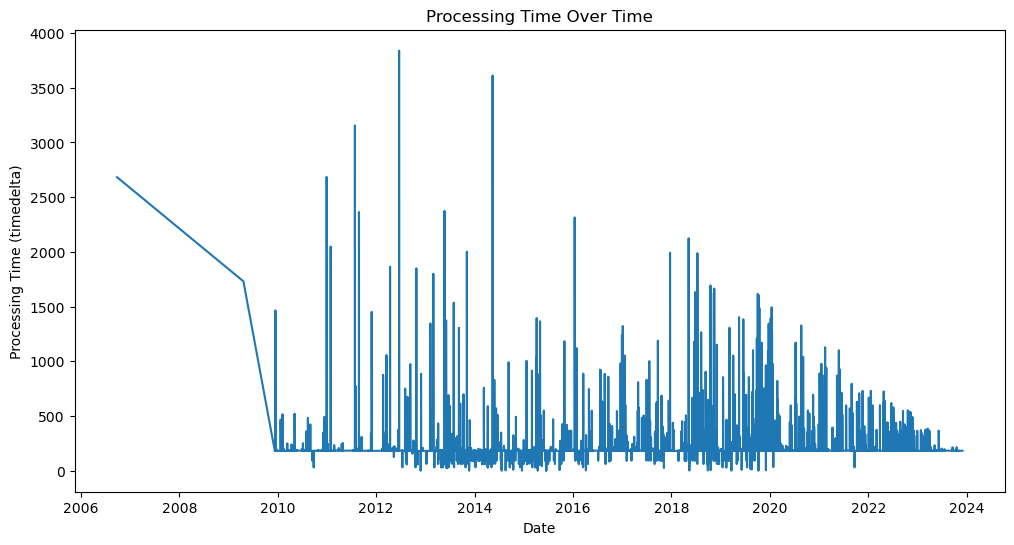

In [35]:
plt.figure(figsize=(12, 6))

plt.plot(dataset['Processing Time'])

plt.title('Processing Time Over Time')
plt.xlabel('Date')
plt.ylabel('Processing Time (timedelta)')

plt.show()

In [36]:
dataset['Processing Time'].value_counts().head(3)

Processing Time
183    186030
180    131365
182    122348
Name: count, dtype: int64

- **Most of the building permits are giving in 180, 182, or 183 days.**

## Descriptive Statistics of Processing Time

In [37]:
mean_processing_time = dataset['Processing Time'].mean()
print(f"The average processing time for building permits is approximately {mean_processing_time:.2f} days.")

median_processing_time = dataset['Processing Time'].median()
print(f"The median processing time for building permits is {median_processing_time:.2f} days.")

std_processing_time = dataset['Processing Time'].std()
print(f"The standard deviation of processing time indicates the variability in permit processing, with a value of {std_processing_time:.2f} days.")

The average processing time for building permits is approximately 182.03 days.
The median processing time for building permits is 182.00 days.
The standard deviation of processing time indicates the variability in permit processing, with a value of 20.51 days.


## Distribution of processing time for each year

In [38]:
columns_to_keep = ['Processing Time']
dataset = dataset[columns_to_keep]

# Consistent Time Zone Information
dataset.index = dataset.index.tz_convert(None)

print(dataset.shape)

dataset.head()

(555838, 1)


,Processing Time
issued_date,
2006-09-26 04:00:00,2682
2006-09-26 04:00:00,2682
2009-04-21 04:00:00,1730
2009-04-21 04:00:00,1730
2009-12-09 20:56:06,181


In [39]:
grouped_by_year = dataset.groupby(dataset.index.year)['Processing Time']

In [40]:
statistics_of_groups_for_each_year = grouped_by_year.agg(['mean', 'median', 'std']).sort_index()
statistics_of_groups_for_each_year

,mean,median,std
issued_date,,,
2006,2682.000000,2682.0,0.000000
2009,188.449275,181.0,100.201411
2010,181.705249,182.0,14.884082
2011,182.198681,182.0,23.013306
2012,182.096561,182.0,26.503487
2013,181.909672,182.0,26.081292
2014,181.651327,182.0,18.621112
2015,182.091990,182.0,14.377010
2016,181.904819,181.0,16.415934


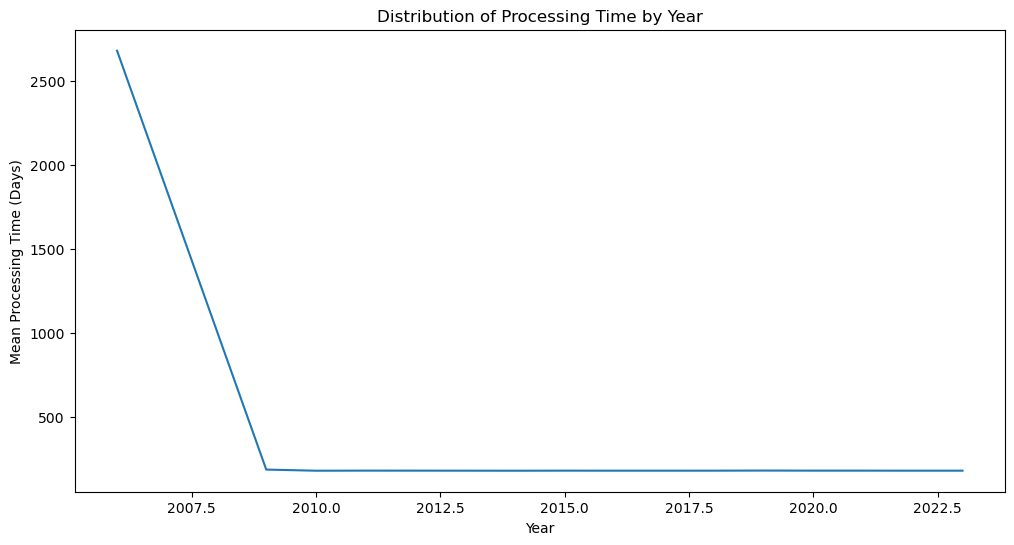

In [41]:
plt.figure(figsize=(12, 6))

sns.lineplot(x = statistics_of_groups_for_each_year.index, y = statistics_of_groups_for_each_year['mean'])
plt.title('Distribution of Processing Time by Year')
plt.xlabel('Year')
plt.ylabel('Mean Processing Time (Days)')

plt.show()

- **The mean processing time is drastically reduced and and is been maintaining constant from the year around 2010**

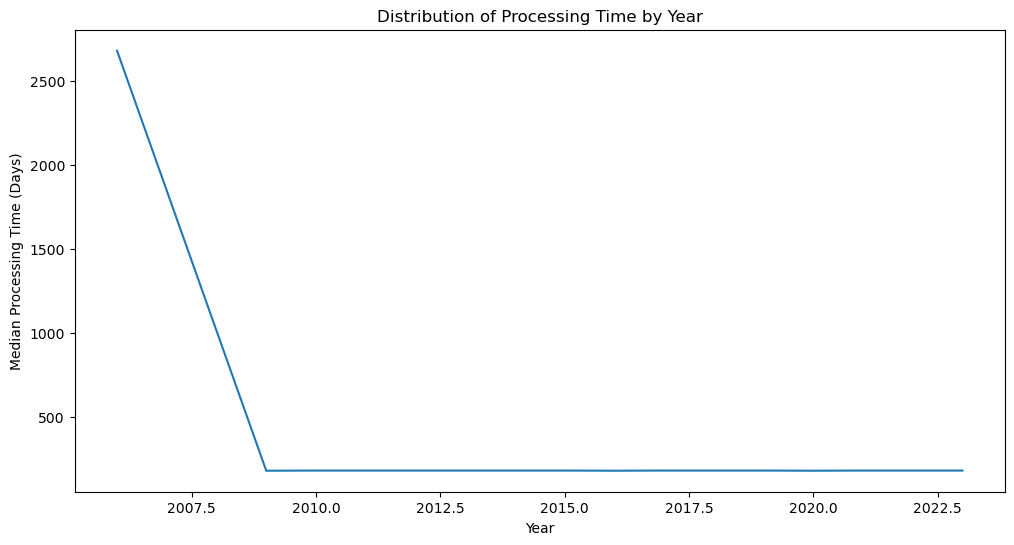

In [42]:
plt.figure(figsize=(12, 6))

sns.lineplot(x = statistics_of_groups_for_each_year.index, y = statistics_of_groups_for_each_year['median'])
plt.title('Distribution of Processing Time by Year')
plt.xlabel('Year')
plt.ylabel('Median Processing Time (Days)')

plt.show()

- **The median processing time is drastically reduced and and is been maintaining constant from the year around 2010**

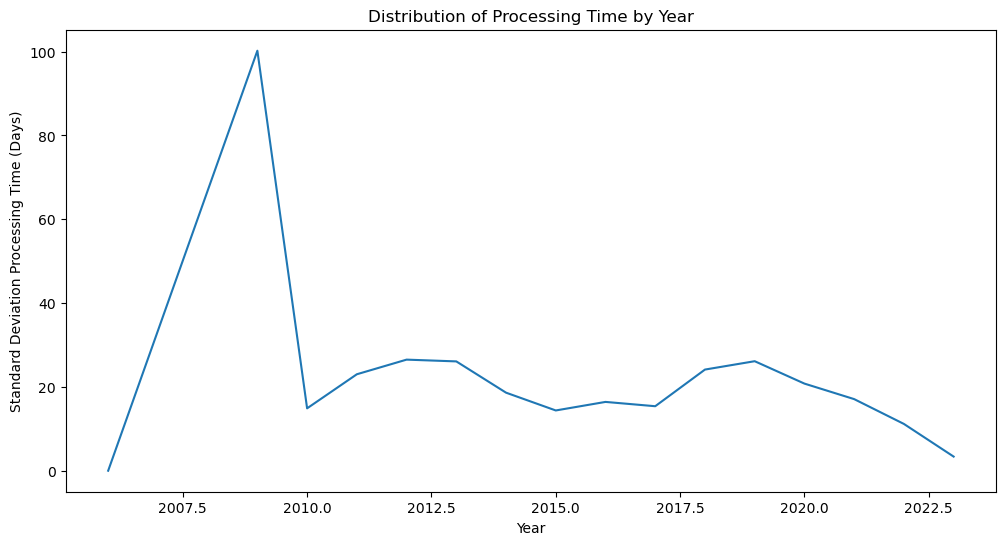

In [43]:
plt.figure(figsize=(12, 6))

sns.lineplot(x = statistics_of_groups_for_each_year.index, y = statistics_of_groups_for_each_year['std'])
plt.title('Distribution of Processing Time by Year')
plt.xlabel('Year')
plt.ylabel('Standard Deviation Processing Time (Days)')

plt.show()

- **Standard Deviation of 0 in 2006:**
**This means that, for the year 2006, the 'Processing Time' values were constant or very close to constant. All the values were the same or very similar.**

- **Standard Deviation of 100 in 2009:**
**In 2009, a standard deviation of 100 suggests a higher degree of variability in the 'Processing Time' values compared to 2006. The values are more spread out from the mean.**
  
- **Standard Deviation from 2010-2023:**
**A standard deviation ranging from 26 to 3 during this period suggests some variability in 'Processing Time' values, but the spread is relatively smaller compared to the year 2009.**

In [44]:
from scipy.stats import ttest_ind

year_1_data = grouped_by_year.get_group(2021)
year_2_data = grouped_by_year.get_group(2022)

t_stat, p_value = ttest_ind(year_1_data, year_2_data)
print(f'T-test between 2021 and 2022: T-statistic = {t_stat}, p-value = {p_value}')

T-test between 2021 and 2022: T-statistic = 2.0448897031990896, p-value = 0.040869150769025406


## One-way ANOVA

In [45]:
# Group by year
grouped_by_year = dataset.groupby(dataset.index.year)

samples_per_year = {}

for year in [2006, *np.arange(2009, 2024)]:
    samples_per_year[year] = len(grouped_by_year.get_group(year))

In [46]:
print(samples_per_year)

{2006: 2, 2009: 828, 2010: 32692, 2011: 36390, 2012: 37769, 2013: 39268, 2014: 42157, 2015: 41885, 2016: 44988, 2017: 45791, 2018: 44804, 2019: 45201, 2020: 32080, 2021: 37147, 2022: 39290, 2023: 35546}


- **The years 2010 to 2023 have a considerable number of observations (ranging from 32,690 to 45,791), which should allow for meaningful statistical analysis.**

In [47]:
from scipy.stats import f_oneway

years = dataset.index.year.unique()
groups = [dataset.loc[dataset.index.year == year, 'Processing Time'] for year in years]

f_stat, p_value = f_oneway(*groups)
print(f'One-way ANOVA: F-statistic = {f_stat}, p-value = {p_value}')

One-way ANOVA: F-statistic = 2104.422402822875, p-value = 0.0


- **Null Hypothesis: There is no significant difference in the means of 'Processing Time' across different years.**
-  **Alernative Hypothesis: At least one group mean is different.**

- **F-statistic:**
**The F-statistic is a measure of the ratio of variances between groups to the variance within groups. In the context of one-way ANOVA, it indicates whether the means of the groups are significantly different. A higher F-statistic suggests a higher likelihood of significant differences.**
  
- **p-value:**
**The p-value associated with the F-statistic is extremely small (0.0 or very close to 0). The p-value represents the probability of observing such extreme results (or more extreme) under the assumption that the null hypothesis is true.**
  
<br>**With such a small p-value, we reject the null hypothesis. In the context of your one-way ANOVA, it implies that there are significant differences in the means of 'Processing Time' across different years.
It means that there is strong evidence that at least one year has a different average 'Processing Time' compared to the others.**

### Tukey's HSD Post-Hoc Test

- **To identify which specific pairs of years have significant differences in mean Processing Time, we can perform post-hoc tests. (Tukey's HSD)**

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(dataset['Processing Time'], dataset.index.year, alpha=0.05)

# Print the results
print(tukey_results)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
  2006   2009 -2493.5507    0.0 -2541.9427 -2445.1588   True
  2006   2010 -2500.2948    0.0 -2548.6298 -2451.9597   True
  2006   2011 -2499.8013    0.0 -2548.1362 -2451.4664   True
  2006   2012 -2499.9034    0.0 -2548.2383 -2451.5686   True
  2006   2013 -2500.0903    0.0 -2548.4251 -2451.7555   True
  2006   2014 -2500.3487    0.0 -2548.6834 -2452.0139   True
  2006   2015  -2499.908    0.0 -2548.2428 -2451.5733   True
  2006   2016 -2500.0952    0.0 -2548.4298 -2451.7605   True
  2006   2017 -2500.1036    0.0 -2548.4383  -2451.769   True
  2006   2018 -2500.0091    0.0 -2548.3437 -2451.6744   True
  2006   2019 -2499.3614    0.0 -2547.6961 -2451.0268   True
  2006   2020 -2499.8717    0.0 -2548.2068 -2451.5366   True
  2006   2021 -2499.8838    0.0 -2548.2187 -2451.5489   True
  2006   2022 -2500.0962

- **The negative mean differences indicate that, on average, 'Processing Time' tends to decrease over the years. For example, the mean difference between 2006 and 2009 is negative, indicating a decrease.**

- **Reject = True, indicates the pair with significant differences, and False indicated the pair with no significant differences.**

### Considerations for Practical Significance:

In [49]:
from itertools import combinations

years = [2006, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
all_pairs = list(combinations(years, 2))

unique_pairs = [(a, b) for a, b in all_pairs if (b, a) not in all_pairs]

year_1_data = dataset.loc[dataset.index.year == 2020, 'Processing Time']
year_2_data = dataset.loc[dataset.index.year == 2021, 'Processing Time']

t_stat, p_value = ttest_ind(year_1_data, year_2_data)

pooled_std = np.sqrt((year_1_data.std()**2 + year_2_data.std()**2) / 2)
cohen_d = (year_1_data.mean() - year_2_data.mean()) / pooled_std

print(f'T-test for 2020 vs. 2021: T-statistic = {t_stat}, p-value = {p_value}')
print(f'Cohen\'s d: {cohen_d}')


T-test for 2020 vs. 2021: T-statistic = 0.08416472301142133, p-value = 0.9329257089705212
Cohen's d: 0.0006369257175799281


In [50]:
from itertools import combinations
from scipy.stats import ttest_ind

years = [2006, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
all_pairs = list(combinations(years, 2))

unique_pairs = [(a, b) for a, b in all_pairs if (b, a) not in all_pairs]
group1_list, group2_list, t_stat_list, p_value_list, cohen_d_list = [], [], [], [], []

# Looping through pairs and perform t-test
for pair in unique_pairs:
    year_1_data = dataset.loc[dataset.index.year == pair[0], 'Processing Time']
    year_2_data = dataset.loc[dataset.index.year == pair[1], 'Processing Time']
    
    t_stat, p_value = ttest_ind(year_1_data, year_2_data)
    
    pooled_std = np.sqrt((year_1_data.std()**2 + year_2_data.std()**2) / 2)
    cohen_d = (year_1_data.mean() - year_2_data.mean()) / pooled_std
    
    group1_list.append(pair[0])
    group2_list.append(pair[1])
    t_stat_list.append(t_stat)
    p_value_list.append(p_value)
    cohen_d_list.append(cohen_d)

results_df = pd.DataFrame({
    'Group1': group1_list,
    'Group2': group2_list,
    'T-Statistic': t_stat_list,
    'P-Value': p_value_list,
    'Cohens_d': cohen_d_list
})

/Users/neereshkumarperla/miniconda3/envs/machine-learning-env/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [51]:
results_df.head()

,Group1,Group2,T-Statistic,P-Value,Cohens_d
0,2006,2009,35.172068,1.717493e-166,35.193250
1,2006,2010,237.562298,0.000000e+00,237.565931
2,2006,2011,153.615670,0.000000e+00,153.617781
3,2006,2012,133.391901,0.000000e+00,133.393667
4,2006,2013,135.561406,0.000000e+00,135.563132
